In [1]:
#Michael Sanati
import pandas as pd

# Load your CSV data into a Pandas DataFrame
df = pd.read_csv('numeric_missing_values_filled.csv')

# Check for missing values in specific columns
columns_to_check = ['player1_hand', 'player1_ioc', 'player2_hand', 'player2_ioc', 'tourney_name', 'tourney_date','player1_seed','player2_seed', 'surface', 'round', 'best_of']

# Check for missing values in each specified column
for column in columns_to_check:
    if df[column].isna().any():
        print(f"Column '{column}' has missing values.")
    else:
        print(f"Column '{column}' has no missing values.")


C:\Users\Michael\AppData\Local\Temp\ipykernel_20956\2276839303.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('numeric_missing_values_filled.csv')


Column 'player1_hand' has missing values.
Column 'player1_ioc' has missing values.
Column 'player2_hand' has missing values.
Column 'player2_ioc' has missing values.
Column 'tourney_name' has no missing values.
Column 'tourney_date' has no missing values.
Column 'player1_seed' has no missing values.
Column 'player2_seed' has no missing values.
Column 'surface' has missing values.
Column 'round' has no missing values.
Column 'best_of' has no missing values.


In [2]:
# Columns to check and fill
columns_to_fill = ['player1_hand', 'player1_ioc', 'player2_hand', 'player2_ioc', 'surface']

# Fill empty cells with 'U'
df[columns_to_fill] = df[columns_to_fill].fillna('U')

# Save the DataFrame to a new CSV file
df.to_csv('filled_data.csv', index=False)

In [3]:
# Load your CSV data into a Pandas DataFrame
df = pd.read_csv('filled_data.csv')
 
# Check for missing values in each specified column
for column in columns_to_check:
    if df[column].isna().any():
        print(f"Column '{column}' has missing values.")
    else:
        print(f"Column '{column}' has no missing values.")

C:\Users\Michael\AppData\Local\Temp\ipykernel_20956\1004546410.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('filled_data.csv')


Column 'player1_hand' has no missing values.
Column 'player1_ioc' has no missing values.
Column 'player2_hand' has no missing values.
Column 'player2_ioc' has no missing values.
Column 'tourney_name' has no missing values.
Column 'tourney_date' has no missing values.
Column 'player1_seed' has no missing values.
Column 'player2_seed' has no missing values.
Column 'surface' has no missing values.
Column 'round' has no missing values.
Column 'best_of' has no missing values.


In [4]:
# One-hot encoding for player1_hand, player2_hand, best_of, and surface

# Load your CSV data into a Pandas DataFrame
df = pd.read_csv('filled_data.csv')

# Define the list of original columns to keep
original_columns = ['player1_hand', 'player2_hand', 'best_of', 'surface']

# One-hot encoding for specified columns
categorical_columns = original_columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)

# Create a new DataFrame that includes both original and encoded columns
df_with_original = df[original_columns].join(df_encoded)

# Save the DataFrame with original and encoded columns to a new CSV file
df_with_original.to_csv('hot_encoded_data.csv', index=False)

C:\Users\Michael\AppData\Local\Temp\ipykernel_20956\3564765702.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('filled_data.csv')


In [5]:
#Binary encoding for tourney_name, player1_ioc, player2_ioc, player1_seed, player2_seed, tourney_level, round

import category_encoders as ce
# Load your CSV data into a Pandas DataFrame
df = pd.read_csv('hot_encoded_data.csv')

# Define the list of original columns to keep
original_columns = ["tourney_name", "player1_ioc", "player2_ioc", "player1_seed", "player2_seed", "tourney_level", 'round']

# Specify the columns to be binary encoded
columns_to_encode = ["tourney_name", "player1_ioc", "player2_ioc", "player1_seed", "player2_seed", 'tourney_level', 'round']

# Create a binary encoder
encoder = ce.BinaryEncoder(cols=columns_to_encode)

# Apply binary encoding to the specified columns
df_encoded = encoder.fit_transform(df)

# Create a new DataFrame that includes both original and encoded columns
df_with_original = df[original_columns].join(df_encoded)

# Save the DataFrame with original and encoded columns to a new CSV file
df_with_original.to_csv('final_encoded_data.csv', index=False)

C:\Users\Michael\AppData\Local\Temp\ipykernel_20956\2288653058.py:5: DtypeWarning: Columns (6,15,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hot_encoded_data.csv')


C:\Users\Michael\AppData\Local\Temp\ipykernel_20956\839727152.py:4: DtypeWarning: Columns (5,54,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_encoded = pd.read_csv('final_encoded_data.csv')


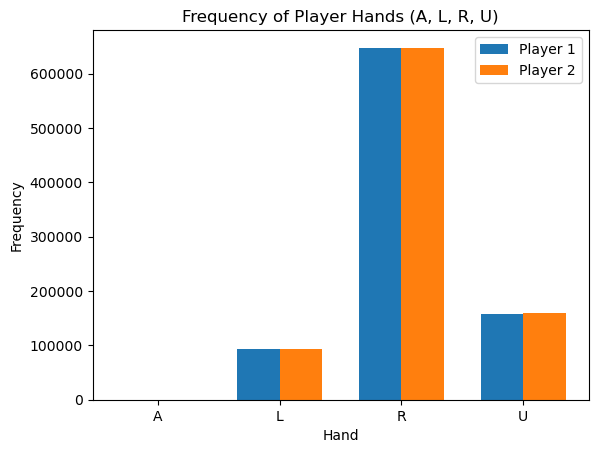

In [6]:
#Column Bar for player1_hand and player2_hand hot encoder, each column is the category (A,L,R,U)

import matplotlib.pyplot as plt

# Load the encoded DataFrame
df_encoded = pd.read_csv('final_encoded_data.csv')

#Player Hand Visualization:

# Group the columns by hand (A, L, R, U)
hands = ['A', 'L', 'R', 'U']
player1_columns = ['player1_hand_' + hand for hand in hands]
player2_columns = ['player2_hand_' + hand for hand in hands]

# Calculate the sum of 1s in each hand category for player1 and player2
player1_sums = [df_encoded[col].sum() for col in player1_columns]
player2_sums = [df_encoded[col].sum() for col in player2_columns]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
index = range(len(hands))

# Create the bar chart
plt.bar(index, player1_sums, bar_width, label='Player 1')
plt.bar([i + bar_width for i in index], player2_sums, bar_width, label='Player 2')

# Customize the chart
plt.xlabel('Hand')
plt.ylabel('Frequency')
plt.title('Frequency of Player Hands (A, L, R, U)')
plt.xticks([i + bar_width / 2 for i in index], hands)
plt.legend()

# Show the chart
plt.show()

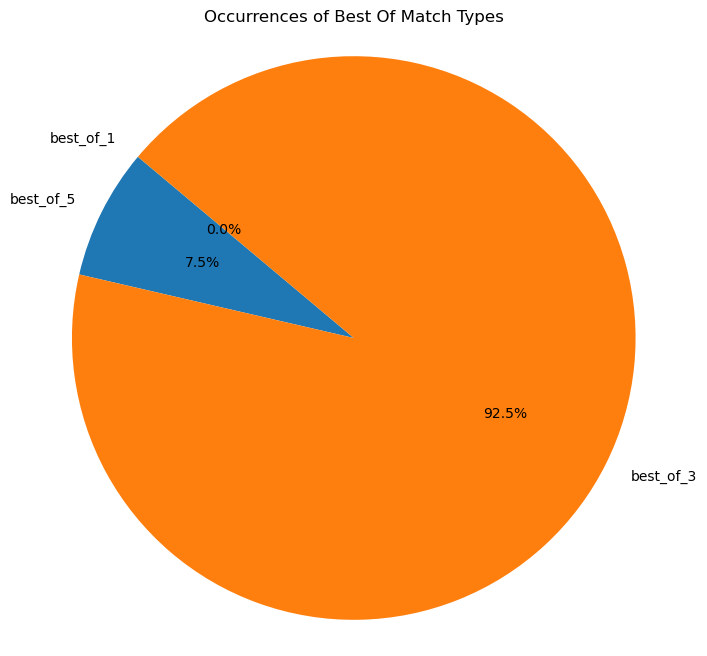

In [7]:
#Best Of Visualization:

# Define the column names for the specific range of columns you want
# Replace these with your actual column names
selected_columns = ['best_of_5', 'best_of_3', 'best_of_1']

# Initialize a list to store the counts of 1s in each selected column
counts = []

# Loop through each selected column and count the occurrences of 1
for column in selected_columns:
    count_ones = df[column].sum()
    counts.append(count_ones)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=selected_columns, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.title("Occurrences of Best Of Match Types")
plt.show()

#the reason we have a best_of_1 in our hot encoded data but it shows up as 0% in the visualization, is cause there is exactly only 1 instance of this occuring

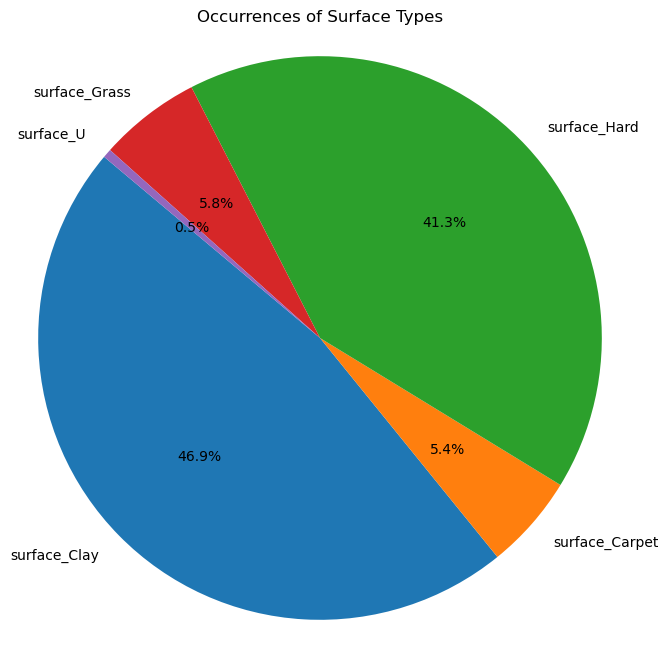

In [8]:
#Surface Visualization:

# Define the column names for the specific range of columns you want
# Replace these with your actual column names
selected_columns = ['surface_Clay', 'surface_Carpet', 'surface_Hard', 'surface_Grass', 'surface_U']

# Initialize a list to store the counts of 1s in each selected column
counts = []

# Loop through each selected column and count the occurrences of 1
for column in selected_columns:
    count_ones = df[column].sum()
    counts.append(count_ones)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=selected_columns, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.title("Occurrences of Surface Types")
plt.show()

In [9]:
#for finding list of categories

# Replace 'your_column_name' with the actual name of the column you're interested in
column_name = 'player1_entry'
df = pd.read_csv('final_encoded_data.csv')
# Get unique categories in the specified column
unique_categories = df[column_name].unique()

# Print the list of unique categories
print("List of unique categories in the column:")
for category in unique_categories:
    print(category)

C:\Users\Michael\AppData\Local\Temp\ipykernel_20956\3954375021.py:5: DtypeWarning: Columns (5,54,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_encoded_data.csv')


List of unique categories in the column:
nan
LL
Q
WC
PR
S
SE
ALT
A
JE
IR
JR
ITF
AL
I
P
J


In [12]:
#for checking if features containing any cells with 1

import pandas as pd

# Load your data into a Pandas DataFrame (replace 'your_data.csv' with your file)
df = pd.read_csv('final_encoded_data.csv')

# Specify the column you want to check (replace 'column_name' with the actual column name)
column_name = 'player2_hand_A'

# Check if any cell in the specified column contains 1
contains_1 = df[column_name].eq(1).any()
count_of = contains_1.sum()

# Print the result
if contains_1:
    print(f"The column '{column_name}' contains {count_of} cell(s) with the value 1.")
else:
    print(f"The column '{column_name}' does not contain any cells with the value 1.")

C:\Users\Michael\AppData\Local\Temp\ipykernel_20956\3836570821.py:6: DtypeWarning: Columns (5,54,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_encoded_data.csv')


The column 'player2_hand_A' contains 1 cell(s) with the value 1.


In [14]:
import pandas as pd

# Load your CSV data into a Pandas DataFrame
df = pd.read_csv('final_encoded_data.csv')

# Specify the column you want to check for missing values
column_name = 'player2_entry'

# Count the missing values in the specified column
missing_count = df[column_name].isnull().sum()

# Calculate the total number of values in the column
total_count = len(df)

# Calculate the percentage of missing values
percentage_missing = (missing_count / total_count) * 100

# Print the results
print(f"Total missing values in '{column_name}': {missing_count}")
print(f"Total values in '{column_name}': {total_count}")
print(f"Percentage of missing values: {percentage_missing:.2f}%")

C:\Users\Michael\AppData\Local\Temp\ipykernel_20956\1841658164.py:4: DtypeWarning: Columns (5,54,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_encoded_data.csv')


Total missing values in 'player2_entry': 694746
Total values in 'player2_entry': 899360
Percentage of missing values: 77.25%
